In [14]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
data = pd.read_csv('/content/drive/My Drive/anime_ratings.csv')

In [17]:
data.head()

,title,mediaType,eps,duration,startYr,finishYr,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
0,Dragon Ball Z Movie 15: Resurrection 'F',Movie,1,67.0,2015,2015,Even the complete obliteration of his physical...,No,4649,86,3.979,3100.0,Toei Animation,No,Other
1,Kuripuri*Kuripura,Movie,1,5.0,2008,2008,NaN,No,10,0,2.120,10.0,Others,No,Other
2,GJ-bu@,TV Special,1,46.0,2014,2014,The story is set during the spring vacation im...,No,1630,16,3.758,1103.0,Others,No,Other
3,Nausicaa of the Valley of the Wind,Movie,1,67.0,1984,1984,One thousand years after the Giant Warriors ca...,No,4649,184,4.444,3100.0,Others,No,Drama
4,Miru Tights Special,DVD Special,1,4.0,2019,2019,Yua is asked to model an illustrator's designs...,No,346,8,2.494,234.0,Others,No,Other


In [18]:
data.shape


(6523, 15)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6523 entries, 0 to 6522
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           6523 non-null   object 
 1   mediaType       6496 non-null   object 
 2   eps             6523 non-null   int64  
 3   duration        6248 non-null   float64
 4   startYr         6523 non-null   int64  
 5   finishYr        6523 non-null   int64  
 6   description     4114 non-null   object 
 7   contentWarn     6523 non-null   object 
 8   watched         6523 non-null   int64  
 9   watching        6523 non-null   int64  
 10  rating          6523 non-null   float64
 11  votes           6496 non-null   float64
 12  studio_primary  6523 non-null   object 
 13  studios_colab   6523 non-null   object 
 14  genre           6523 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 764.5+ KB


In [20]:
df = data.copy()


In [21]:
df.isnull().sum()

,0
title,0
mediaType,27
eps,0
duration,275
startYr,0
finishYr,0
description,2409
contentWarn,0
watched,0
watching,0


In [22]:
df1 = df.copy()

In [23]:

df1.mediaType.fillna("Other", inplace=True)

df1["duration"] = df1["duration"].fillna(value=df1.groupby(["genre", "mediaType"])["duration"].transform("median"))
df1["votes"] = df1["votes"].fillna(value=df1.groupby(["genre", "mediaType"])["votes"].transform( "median"))

<ipython-input-23-74a9ea9f40dc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1.mediaType.fillna("Other", inplace=True)


In [24]:
df1["duration"] = df1["duration"].fillna(value=df1.groupby(["genre"])["duration"].transform( "median" ))
df1.isnull().sum()


,0
title,0
mediaType,0
eps,0
duration,0
startYr,0
finishYr,0
description,2409
contentWarn,0
watched,0
watching,0


In [25]:
df1["years_running"] = df1["finishYr"] - df1["startYr"]
df1.drop(["startYr", "finishYr"], axis=1, inplace=True)
df1.head()

,title,mediaType,eps,duration,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre,years_running
0,Dragon Ball Z Movie 15: Resurrection 'F',Movie,1,67.0,Even the complete obliteration of his physical...,No,4649,86,3.979,3100.0,Toei Animation,No,Other,0
1,Kuripuri*Kuripura,Movie,1,5.0,NaN,No,10,0,2.120,10.0,Others,No,Other,0
2,GJ-bu@,TV Special,1,46.0,The story is set during the spring vacation im...,No,1630,16,3.758,1103.0,Others,No,Other,0
3,Nausicaa of the Valley of the Wind,Movie,1,67.0,One thousand years after the Giant Warriors ca...,No,4649,184,4.444,3100.0,Others,No,Drama,0
4,Miru Tights Special,DVD Special,1,4.0,Yua is asked to model an illustrator's designs...,No,346,8,2.494,234.0,Others,No,Other,0


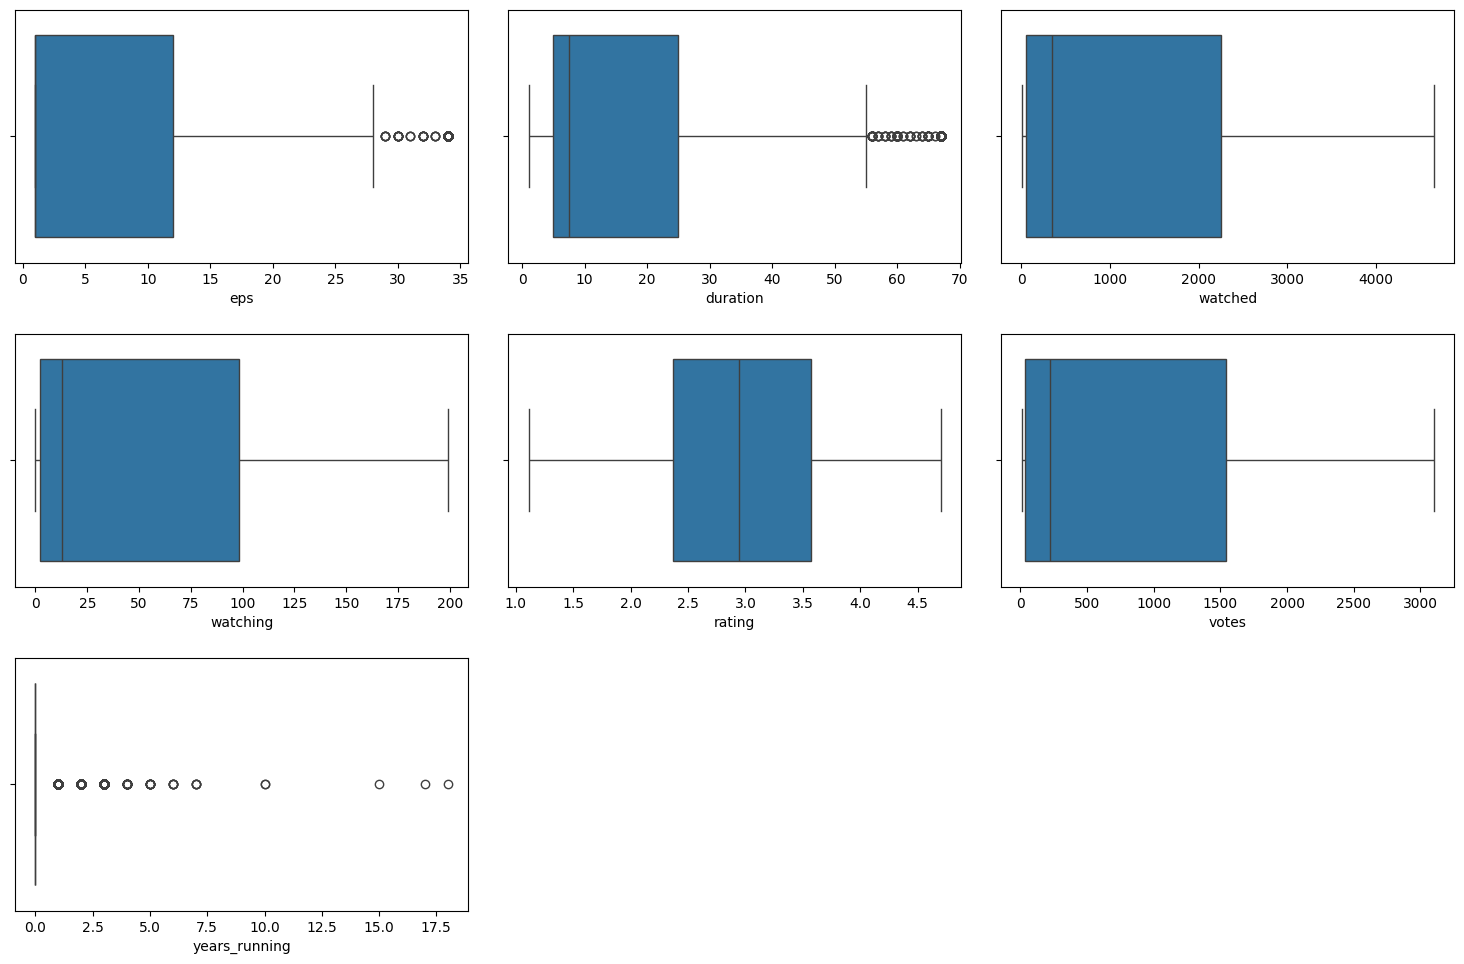

In [26]:
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
  plt.subplot(3, 3, i + 1)
  sns.boxplot(data=df1, x=variable)
  plt.tight_layout(pad=2)

plt.show()

In [27]:
df1.drop(["title", "description"], axis=1, inplace=True)

df1.head()


,mediaType,eps,duration,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre,years_running
0,Movie,1,67.0,No,4649,86,3.979,3100.0,Toei Animation,No,Other,0
1,Movie,1,5.0,No,10,0,2.120,10.0,Others,No,Other,0
2,TV Special,1,46.0,No,1630,16,3.758,1103.0,Others,No,Other,0
3,Movie,1,67.0,No,4649,184,4.444,3100.0,Others,No,Drama,0
4,DVD Special,1,4.0,No,346,8,2.494,234.0,Others,No,Other,0


In [28]:
df2 = df1.copy()


In [29]:
X = df2.drop(["rating"], axis=1)
y = df2["rating"]


In [30]:
X = sm.add_constant(X)

X = pd.get_dummies(X, columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),drop_first=True)
X.head()



,const,eps,duration,watched,watching,votes,years_running,mediaType_Movie,mediaType_Music Video,mediaType_OVA,...,studio_primary_Toei Animation,studios_colab_Yes,genre_Adventure,genre_Based on a Manga,genre_Comedy,genre_Drama,genre_Fantasy,genre_Other,genre_Romance,genre_Sci Fi
0,1.0,1,67.0,4649,86,3100.0,0,True,False,False,...,True,False,False,False,False,False,False,True,False,False
1,1.0,1,5.0,10,0,10.0,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,1.0,1,46.0,1630,16,1103.0,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,1.0,1,67.0,4649,184,3100.0,0,True,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1.0,1,4.0,346,8,234.0,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [31]:
X = X.astype(float)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("Number of rows in train data",x_train.shape[0])
print("Number of rows in test data",x_test.shape[0])

Number of rows in train data 4566
Number of rows in test data 1957


In [33]:
olsmodel = sm.OLS(y_train, x_train)
results = olsmodel.fit() # Fit the model to the data
print(results.summary()) # Print the summary using the results object

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     357.4
Date:                Wed, 27 Nov 2024   Prob (F-statistic):               0.00
Time:                        05:11:25   Log-Likelihood:                -2307.9
No. Observations:                4566   AIC:                             4684.
Df Residuals:                    4532   BIC:                             4902.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [34]:
def model_performance_regression(model, predictors, target):

  # Get the fitted parameters from the model's results object
  params = model.params

  # Predict using the fitted parameters and the predictor variables
  pred = np.dot(predictors, params)

  r2 = r2_score(target, pred)  # to compute R-squared
  rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
  mae = mean_absolute_error(target, pred)  # to compute MAE

  # creating a dataframe of metrics
  df_perf = pd.DataFrame(
      {
          "RMSE": rmse,
          "MAE": mae,
          "R-squared": r2,
      },
      index=[0],
  )

  return df_perf

In [35]:
print("Training Performance\n")


olsmodel_train_perf = model_performance_regression(results, x_train, y_train)
olsmodel_train_perf


Training Performance



,RMSE,MAE,R-squared
0,0.40112,0.330417,0.722387


In [36]:
print("Test Performance\n")

olsmodel_test_perf = model_performance_regression(results, x_test, y_test)
olsmodel_test_perf


Test Performance



,RMSE,MAE,R-squared
0,0.413096,0.340426,0.703053


In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
def checking_vif(predictors):
  vif = pd.DataFrame()
  vif["feature"] = predictors.columns

# calculating VIF for each feature
  vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(len(predictors.columns))]
  return vif

  checking_vif(x_train) .sort_values('VIF',ascending=False)

In [40]:
def treating_multicollinearity(predictors, target, high_vif_columns):
  adj_r2 = []
  rmse = []
  for cols in high_vif_columns:
    train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]
    olsmodel = sm.OLS(target, train)
    # Fit the model and get the results
    results = olsmodel.fit()
    adj_r2.append(results.rsquared_adj)
    # Access mse_resid from the results object
    rmse.append(np.sqrt(results.mse_resid))

  temp = pd.DataFrame(

  {"col": high_vif_columns, "Adj. R-squared after_dropping col": adj_r2,
  "RMSE after dropping col": rmse,

  }).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
  temp.reset_index(drop=True, inplace=True)

  return temp

col_list = ["watched", "votes"]
res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,votes,0.716994,0.405042
1,watched,0.707967,0.411451


In [50]:
col_to_drop = "votes"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]
vif = checking_vif(x_train2)

print("VIF after dropping ", col_to_drop)
vif


VIF after dropping  votes


,feature,VIF
0,const,152.249342
1,eps,3.873093
2,duration,2.752030
3,watched,3.235392
4,watching,4.154724
5,years_running,1.272523
6,mediaType_Movie,4.060078
7,mediaType_Music Video,2.408173
8,mediaType_OVA,3.049085
9,mediaType_Other,1.729382


In [51]:
olsmod1 = sm.OLS(y_train, x_train2).fit()

print(olsmod1.summary())


                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     362.4
Date:                Wed, 27 Nov 2024   Prob (F-statistic):               0.00
Time:                        05:16:43   Log-Likelihood:                -2335.7
No. Observations:                4566   AIC:                             4737.
Df Residuals:                    4533   BIC:                             4950.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [52]:
predictors = x_train2.copy()
cols = predictors.columns.tolist()

max_p_value = 1

while len(cols) > 0:

  x_train_aux = predictors[cols]
  model = sm.OLS(y_train, x_train_aux).fit()

  p_values = model.pvalues
  max_p_value = max(p_values)

  feature_with_p_max = p_values.idxmax()
  if max_p_value > 0.95:
    cols.remove(feature_with_p_max)
  else:
    break
selected_features = cols
print(selected_features)




['const', 'eps', 'duration', 'watched', 'watching', 'years_running', 'mediaType_Movie', 'mediaType_Music Video', 'mediaType_OVA', 'mediaType_Other', 'mediaType_TV', 'mediaType_TV Special', 'mediaType_Web', 'contentWarn_Yes', 'studio_primary_J.C. Staff', 'studio_primary_MADHOUSE', 'studio_primary_OLM', 'studio_primary_Others', 'studio_primary_Production I.G', 'studio_primary_Studio Deen', 'studio_primary_Studio Pierrot', 'studio_primary_Sunrise', 'studio_primary_TMS Entertainment', 'studio_primary_Toei Animation', 'studios_colab_Yes', 'genre_Adventure', 'genre_Based on a Manga', 'genre_Comedy', 'genre_Drama', 'genre_Fantasy', 'genre_Other', 'genre_Romance', 'genre_Sci Fi']


In [53]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

olsmod2 = sm.OLS(y_train, x_train3).fit()
print (olsmod2.summary())


                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     362.4
Date:                Wed, 27 Nov 2024   Prob (F-statistic):               0.00
Time:                        05:18:17   Log-Likelihood:                -2335.7
No. Observations:                4566   AIC:                             4737.
Df Residuals:                    4533   BIC:                             4950.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [54]:
print("Training Performance\n")

olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf


Training Performance



,RMSE,MAE,R-squared
0,0.403576,0.332761,0.718978


In [55]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues # predicted values
df_pred["Residuals"] = olsmod2.resid # residuals

df_pred.head()


,Actual Values,Fitted Values,Residuals
5432,2.872,2.791471,0.080529
5326,2.766,2.272987,0.493013
1021,4.049,4.439459,-0.390459
836,3.153,3.173346,-0.020346
1396,2.167,2.263109,-0.096109


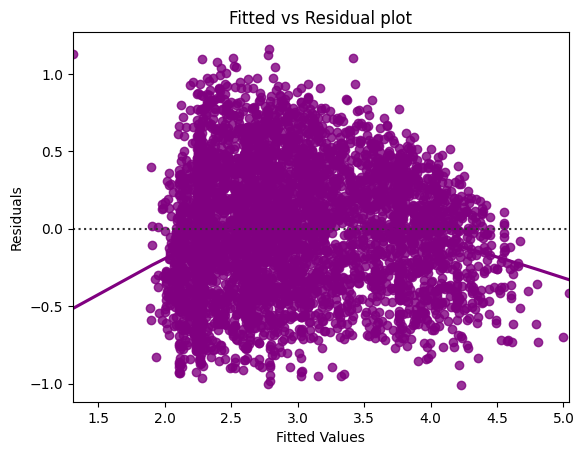

In [57]:
sns.residplot(data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel( "Residuals" )
plt.title("Fitted vs Residual plot")
plt.show()

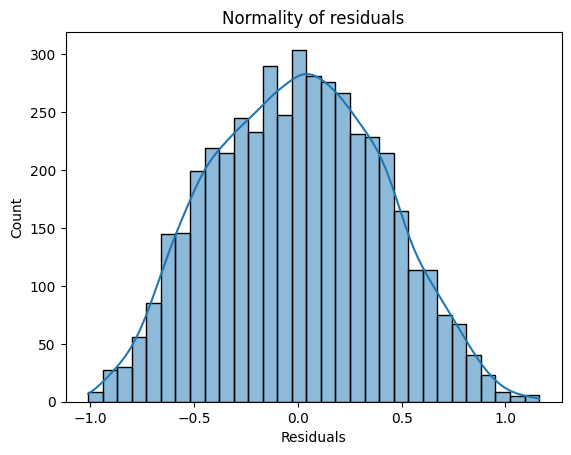

In [58]:
sns .histplot(data=df_pred, x="Residuals", kde=True)

plt.title("Normality of residuals")
plt.show()

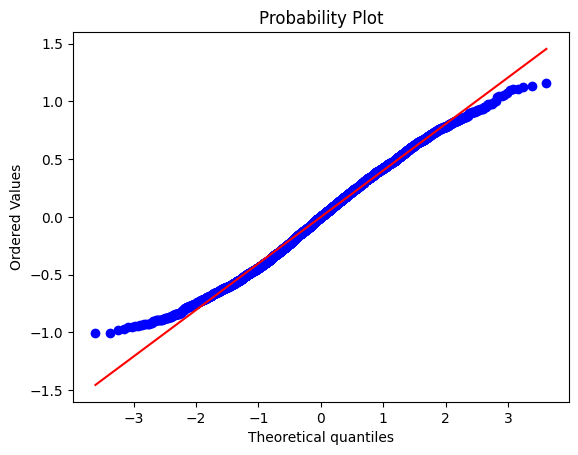

In [59]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [61]:
stats. shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9933732730197746, pvalue=1.0365874714623557e-13)

In [62]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)


[('F statistic', 1.0409668184140752), ('p-value', 0.1705228651935867)]

In [63]:
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
2023,2.039,2.260165
4543,3.236,3.782713
1914,2.314,2.320342
4856,2.457,2.171082
4405,2.322,2.328479
5755,4.344,3.930544
2341,2.858,2.276117
1637,3.976,3.882883
5730,3.728,3.587037
1385,2.692,2.421169


In [65]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

olsmodel_final = sm.OLS(y_train, x_train_final).fit()

print(olsmodel_final.summary())


                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     362.4
Date:                Wed, 27 Nov 2024   Prob (F-statistic):               0.00
Time:                        05:23:46   Log-Likelihood:                -2335.7
No. Observations:                4566   AIC:                             4737.
Df Residuals:                    4533   BIC:                             4950.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   